# Phase Kickback



## Contents

1. [Exploring the CNOT-Gate](#exploring-cnot)
2. [Phase Kickback](#kickback)     
    2.1 [Explaining the CNOT Circuit Identity](#explaining-identity)     
    2.2 [Kickback with the T-gate](#kickback-t-gate)    

## 1. Exploring the CNOT-Gate <a id="exploring-cnot"></a>

In the previous section, we saw some very basic results with the CNOT gate. Here we will explore some more interesting results. 

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

But what happens if we put the second qubit in superposition? 

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

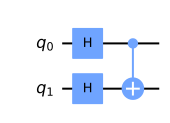

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

In the circuit above, we have the CNOT acting on the state:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the CNOT swaps the amplitudes of $|01\rangle$ and $|11\rangle$, we see no change:

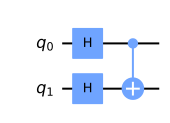

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


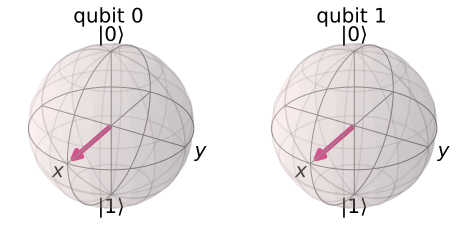

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Let’s put the target qubit in the state $|-\rangle$, so it has a negative phase:

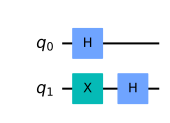

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

This creates the state:

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

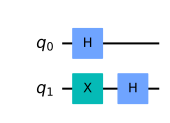

<IPython.core.display.Latex object>

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


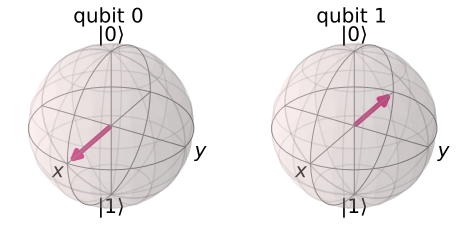

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11\rangle$, resulting in the state:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$


This is interesting, because it affects the state of the _control_ qubit while leaving the state of the _target_ qubit unchanged. 


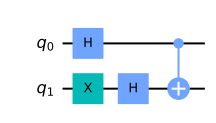

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


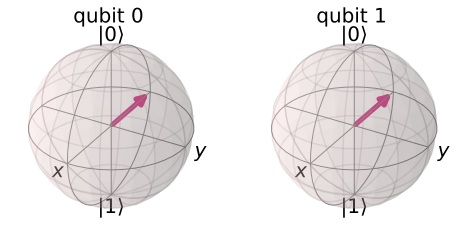

In [6]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If you remember the H-gate transforms $|{+}\rangle \rightarrow |0\rangle$ and $|{-}\rangle \rightarrow |1\rangle$, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction: 

![cnot_identity](images/identities_1.svg)

We can verify this using Qiskit's Aer simulator:

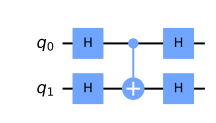

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

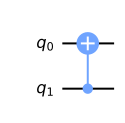

<IPython.core.display.Latex object>

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

This identity is an example of _phase kickback,_ which leads us neatly on to the next section... 

## 2. Phase Kickback <a id="kickback"></a>

### 2.1 Explaining the CNOT Circuit Identity <a id="explaining-identity"></a>
In the previous section we saw this identity:

![cnot_identity](images/identities_1.svg)

This is an example of _kickback_ (or, _phase kickback_ ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a $|{-}\rangle$ qubit gives it the phase $-1$:

$$
X|{-}\rangle = -|{-}\rangle
$$

When our control qubit is in either $|0\rangle$ or $|1\rangle$, this phase affects the whole state, however it is a global phase and has no observable effects:

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of $|1\rangle$ applies this phase factor to the *corresponding* target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$

This can then be written as the two separable qubit states:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned}
$$

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the $(|+\rangle, |-\rangle)$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

### 2.2 Kickback with the T-gate <a id="kickback-t-gate"></a>

Let’s look at another controlled operation, the controlled-T gate: 


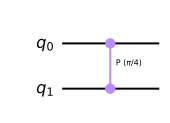

In [9]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

The T-gate has the matrix:

$$
\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}
$$

And the controlled-T gate has the matrix:

$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

We can verify this using Qiskit's Aer simulator:

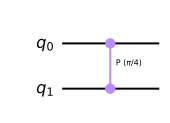

<IPython.core.display.Latex object>

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

More generally, we can find the matrix of any controlled-U operation using the rule:

$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

Or, using Qiskit's qubit ordering:

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$


If we apply the T-gate to a qubit in the state $|1\rangle$, we add a phase of $e^{i\pi/4}$ to this qubit:

$$
T|1\rangle = e^{i\pi/4}|1\rangle
$$

This is _global phase_ and is unobservable. But if we control this operation using another qubit in the $|{+}\rangle$ state, the phase is no longer global but relative, which changes the _relative phase_ in our control qubit:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. Let's see this in Qiskit:

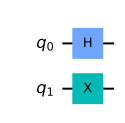

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


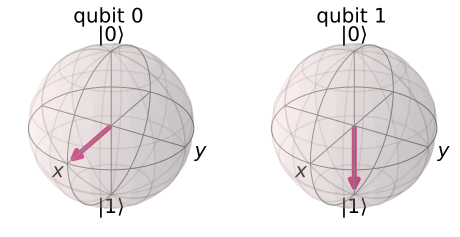

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

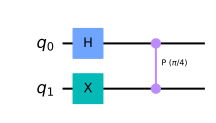

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


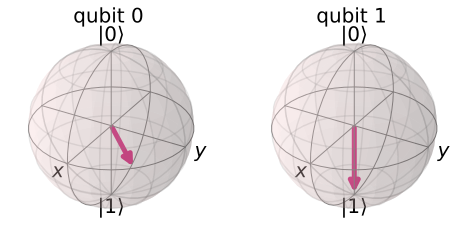

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by $\pi/4$ around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-Z rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.

<img src="images/pkb_z_equiv.svg">

### Quick Exercises:

<ol>
<li>What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state $|0\rangle$? (as shown in the circuit below)? Use Qiskit to check your answer.
<br>
<img src="images/pkb_ex1.svg">
</li>

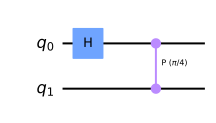

<IPython.core.display.Latex object>

In [18]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4,0,1)
display(qc.draw())
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

<li>What would happen to the control qubit (q0) if the target qubit (q1) was in the state $|1\rangle$, and the circuit used a controlled-Sdg gate instead of the controlled-T (as shown in the circuit below)?
<br>
<img src="images/pkb_ex2.svg">
</li>

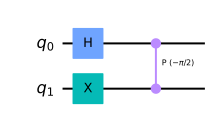

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/2,0,1)
display(qc.draw())
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

<li>What would happen to the control qubit (q0) if it was in the state $|1\rangle$ instead of the state $|{+}\rangle$ before application of the controlled-T (as shown in the circuit below)?
<br>
<img src="images/pkb_ex3.svg">
</li>
</ol>

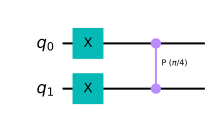

/Users/hilmar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

In [21]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cp(pi/4,0,1)
display(qc.draw())
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table